# Life Expectancy vs GDP: Exploratory Data Analysis and Data Visualisation

## Goals
+ To undertake initial EDA including the five-number summary
+ To highlight patterns as they develop over time
+ To visualise time series data
## Data
+ Data taken from the World Health Organization and the World Bank
+ Data is provided as 'all_data.cvs'
## Analysis
+ Research questions:
  + What is the average life expectancy at birth (LEB) and how is this distributed?
  + What is the average GDP and how is this distributed?
  + Is there a correlation between LEB and GDP?
  + Have LEB and GDP improved over time (and if so, is this true for each individual country?)
+ Visualisation will be presented based on:
  + univatiate;
  + bivariate and;
  + multivariate analysis

## Goal 1: Load data, initial EDA and five-number summary

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv("all_data.csv")
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [120]:
df = df.rename({"Life expectancy at birth (years)":"LEB"}, axis = "columns")

In [122]:
# Dataset info - any need for cleaning? Null values?
print(df.info()) # 96 entries with no null values. Data types seem appropriate for analysis.

# Countries included in the data set
print("Number of countrie included: ", df["Country"].nunique())
print("Countries included: ", df["Country"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   LEB      96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
Number of countrie included:  6
Countries included:  ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [266]:
# Five-number summary
print("LED Five-number summary")
# the sample minimum (smallest observation)
print("Minimum LED: ", min(df["LEB"]))
# the lower quartile or first quartile
lower_quartile = df["LEB"].quantile(0.25)
print("Lower quartile LED: ", lower_quartile)
# the median (the middle value)
print("Median LED: ", np.median(df["LEB"]))
upper_quartile = df["LEB"].quantile(0.75)
print("Upper quartile LED: ", upper_quartile)
# the sample maximum (largest observation)
print("Maximum LED: ", max(df["LEB"]))

# Calculate the IQR
IQR_LED = upper_quartile - lower_quartile
print("IQR: ", IQR_LED)

print()
print("Mean LED: ", np.mean(df["LEB"]))
print()
print()

print("GDP Five-number summary")
# the sample minimum (smallest observation)
print("Minimum GDP: ", min(df["GDP"]))
# the lower quartile or first quartile
lower_quartile_GDP = df["GDP"].quantile(0.25)
print("Lower quartile GDP: ", lower_quartile_GDP)
# the median (the middle value)
print("Median GDP: ", np.median(df["GDP"]))
# the upper quartile or third quartile
upper_quartile_GDP = df["GDP"].quantile(0.75)
print("Upper quartile GDP: ", upper_quartile_GDP)
# the sample maximum (largest observation)
print("Maximum GDP: ", max(df["GDP"]))

# Calculate the IQR
IQR_GDP = upper_quartile_GDP - lower_quartile_GDP
print("IQR: ", IQR_GDP)

print()
print("Mean GDP: ", np.mean(df["GDP"]))

LED Five-number summary
Minimum LED:  44.3
Lower quartile LED:  74.475
Median LED:  76.75
Upper quartile LED:  78.9
Maximum LED:  81.0
IQR:  4.425000000000011

Mean LED:  72.78958333333334


GDP Five-number summary
Minimum GDP:  4415702800.0
Lower quartile GDP:  173301750000.0
Median GDP:  1280220000000.0
Upper quartile GDP:  4067510000000.0
Maximum GDP:  18100000000000.0
IQR:  3894208250000.0

Mean GDP:  3880498570768.396


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


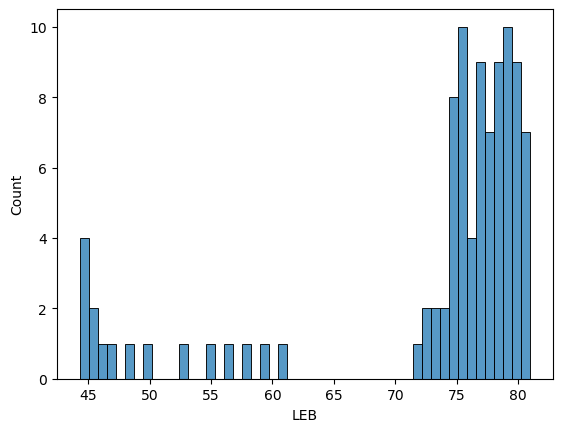

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


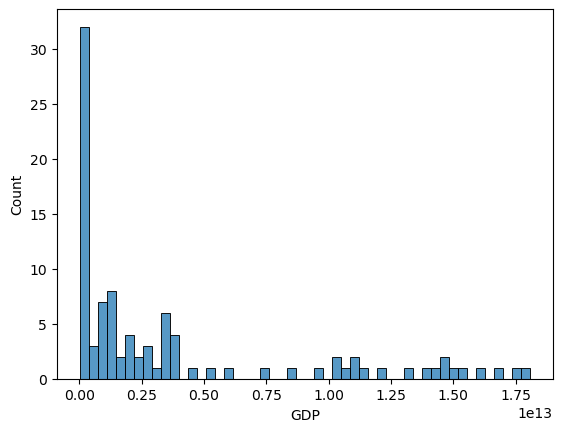

<Figure size 640x480 with 0 Axes>

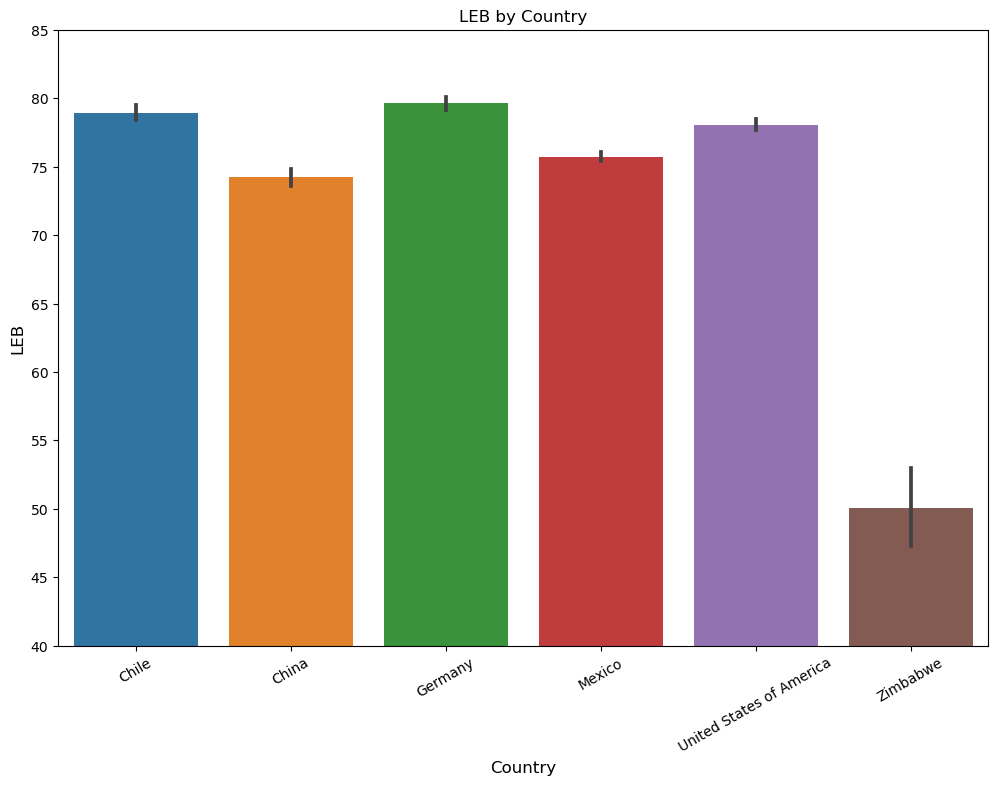

<Figure size 640x480 with 0 Axes>

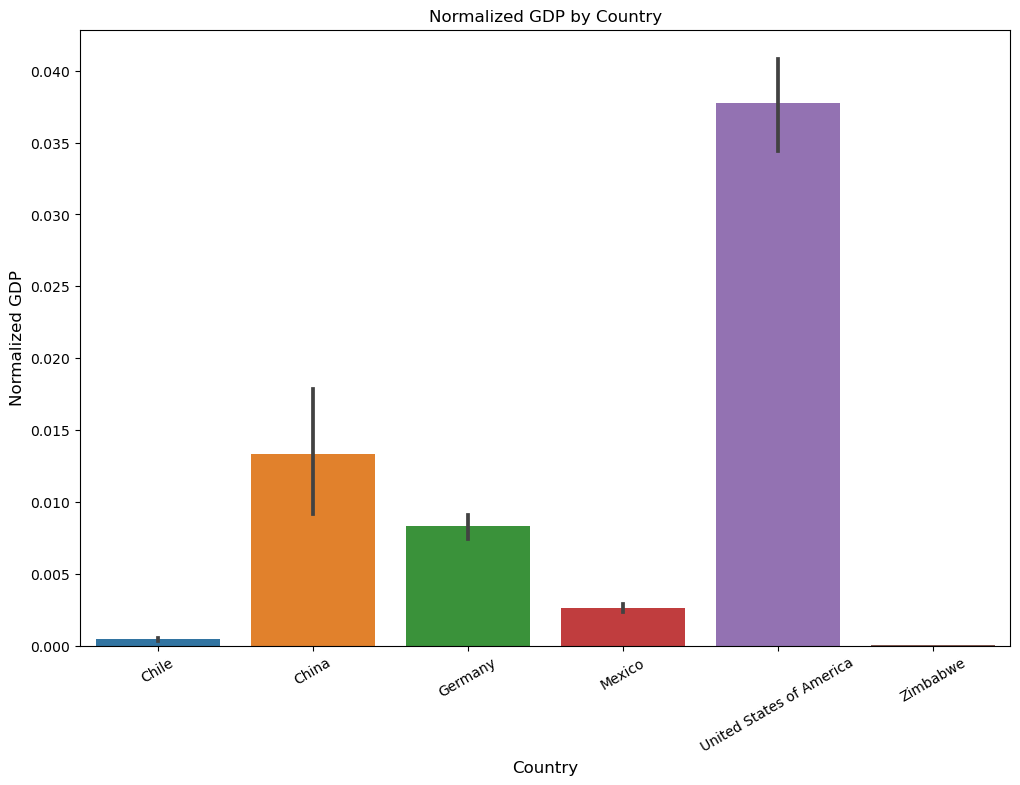

<Figure size 640x480 with 0 Axes>

In [284]:
# Distribution of life expectancy at birth (LEB)
sns.histplot(df["LEB"], bins=50)
plt.show()
plt.clf()

# Distribution of GDP
sns.histplot(df["GDP"], bins=50)
plt.show()
plt.clf()

# Life expectancy by country
plt.figure(figsize=(12, 8))
sns.barplot(x="Country", y="LEB", data=df)
plt.ylim(40, 85)
plt.xticks(rotation=30)
plt.title("LEB by Country")
plt.xlabel("Country", fontsize=12)
plt.ylabel("LEB", fontsize=12)
plt.show()
plt.clf()

# GDP by country
df['Normalized_GDP'] = df['GDP'] / df['GDP'].sum()

plt.figure(figsize=(12, 8))
sns.barplot(x="Country", y="Normalized_GDP", data=df)
plt.xticks(rotation=30)
plt.title("Normalized GDP by Country")
plt.xlabel("Country", fontsize=12)
plt.ylabel("Normalized GDP", fontsize=12)
plt.show()
plt.clf()

### Desisions based on EDA and five-number summary
Life expectancy data is very heavily left-skewed and GDP equally heavily right-skewed.
+ Use Box Plots to display median and inter-quartile ranges (i.e. more robust 

## Goals 2 and 3: Visualisation of patterns in the data

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

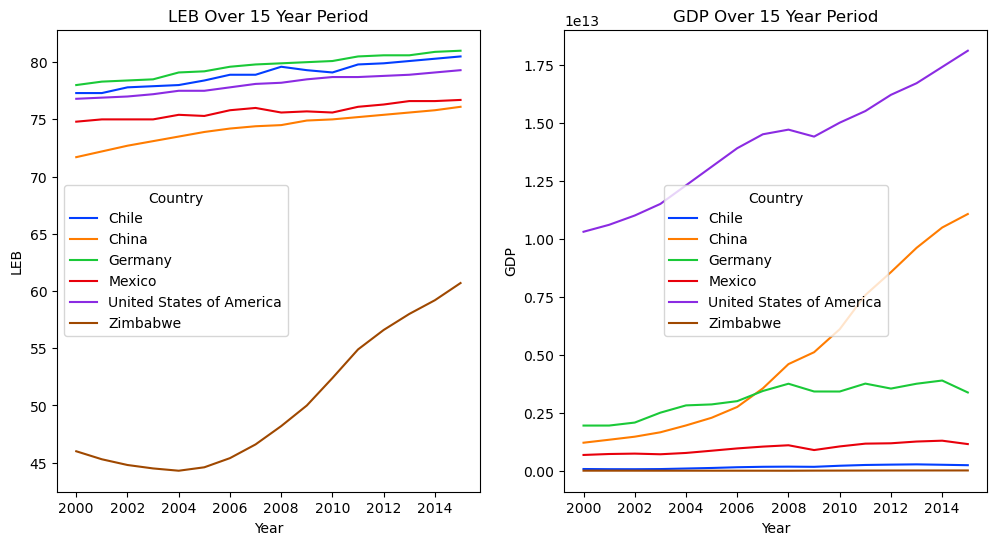

<Figure size 640x480 with 0 Axes>

In [171]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x="Year", y="LEB", hue="Country", data=df, palette="bright")
plt.legend(title="Country")
plt.title("LEB Over 15 Year Period")

plt.subplot(1, 2, 2)
sns.lineplot(x="Year", y="GDP", hue="Country", data=df, palette="bright")
plt.legend(title="Country")
plt.title("GDP Over 15 Year Period")

plt.show()
plt.clf()

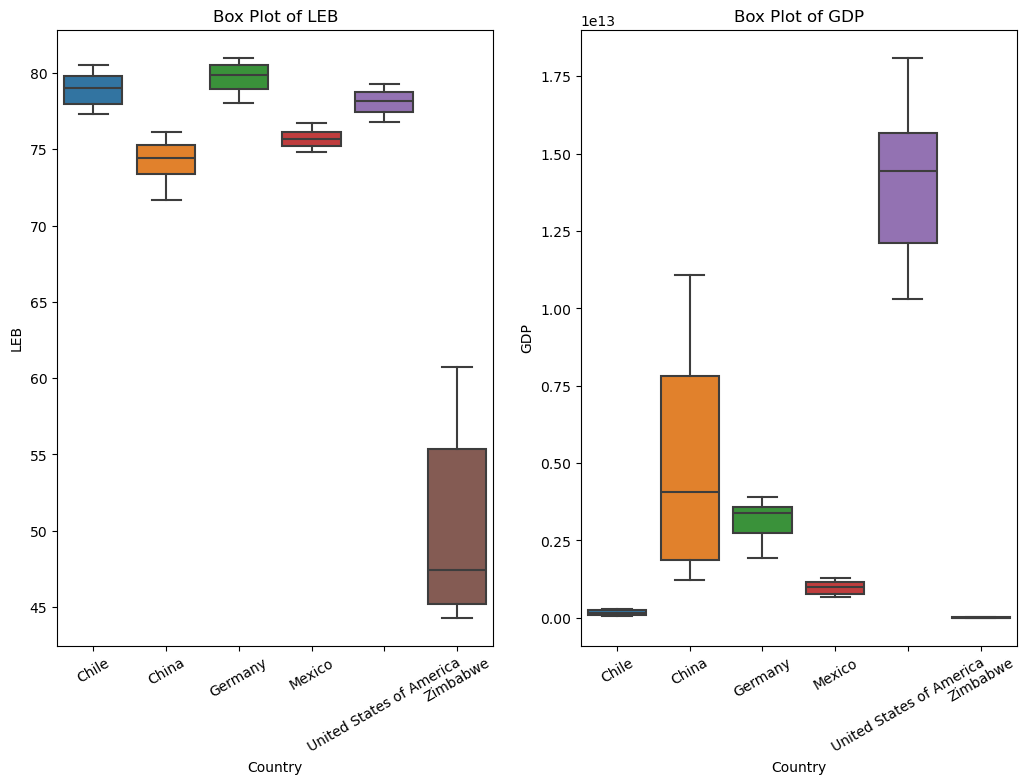

<Figure size 640x480 with 0 Axes>

In [243]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x="Country", y='LEB', data=df)
plt.title('Box Plot of LEB')
plt.ylabel('LEB')
plt.xticks(rotation=30)

plt.subplot(1, 2, 2)
sns.boxplot(x="Country", y='GDP', data=df)
plt.title('Box Plot of GDP')
plt.ylabel('GDP')
plt.xticks(rotation=30)
plt.subplots_adjust(left=0.1)

plt.show()
plt.clf()

### Outliers: Chile and Zimbabwe (GDP)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

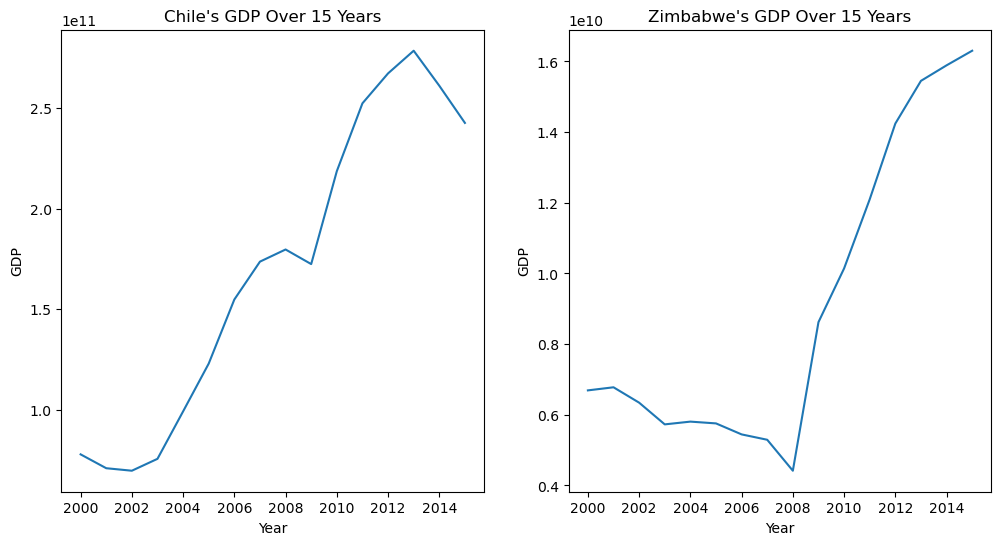

<Figure size 640x480 with 0 Axes>

In [296]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x=df.Year, y=df.GDP[df.Country == "Chile"])
plt.title("Chile's GDP Over 15 Years")

plt.subplot(1, 2, 2)
sns.lineplot(x=df.Year, y=df.GDP[df.Country == "Zimbabwe"])
plt.title("Zimbabwe's GDP Over 15 Years")

plt.show()
plt.clf()

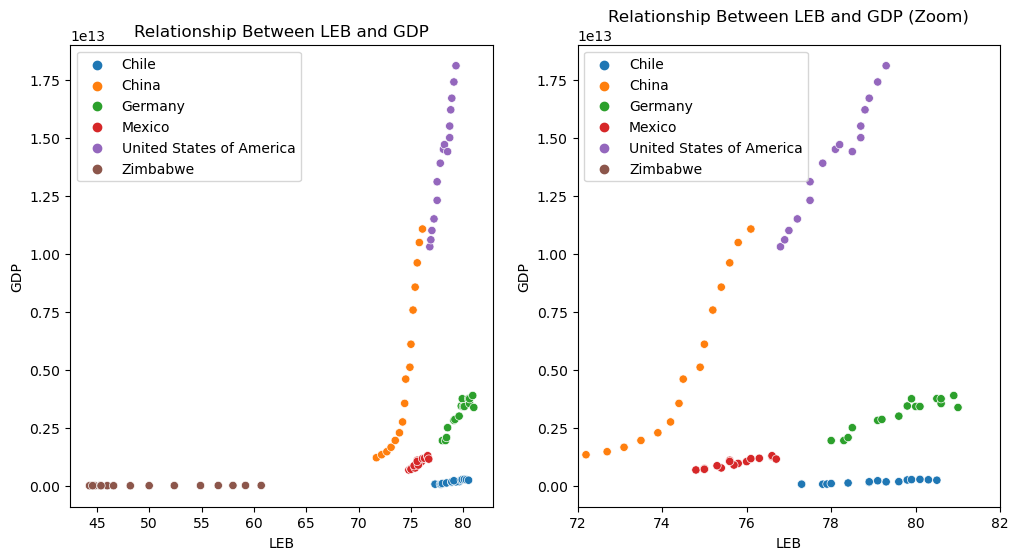

<Figure size 640x480 with 0 Axes>

In [260]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df.LEB, y=df.GDP, hue=df.Country).legend()
plt.title("Relationship Between LEB and GDP")

plt.subplot(1, 2, 2)         
sns.scatterplot(x=df.LEB, y=df.GDP, hue=df.Country).legend()
plt.xlim(72, 82)
plt.title("Relationship Between LEB and GDP (Zoom)")

plt.show()
plt.clf()

## Conclusion


#### 1. What is the average life expectancy at birth (LEB) and how is this distributed?
The mean LEB is 73. However, the distribution has a strong left skew. The mean and median LEB of each country is higher than this with the notable exception of Zimbabwe.

#### 2. What is the average GDP and how is this distributed?
The mean GDP in 3880498570768.396, with the USA accounting for almost 40% of the total. Again, this data is skewed (this time to the right) so box plots have been used to illustrate the median and IQR.

#### 3. Is there a correlation between LEB and GDP?
This is a complex question. The final scatterplots would suggest that there is a correlation, but only once the GDP is sufficiently high. For the USA and China there is a clear correlation. Germany, while showing much less growth in both variables, could be seen to be an extension of Mexico, suggesting a strong correlation. Chile and Zimbabwe, having such low GDPs in relation to the other countries in the dataset, do not demonstrate this correlation. It could however be argued that once they reach a critical level of GDP this trend would be strongly predicted.

#### 4. Have LEB and GDP improved over time (and if so, is this true for each individual country?)
LEB improves steadily over the course of the 15 years with only minor dips. The GDP also improves both overall and for each individual country, although to see this with outliers Chile and Zimbabwe further analysis was required.